In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
streams = pd.read_csv('streams.csv')

In [3]:
streams

,Unnamed: 0,date,country,region,gender,n_of_streams
0,0,2021-10-19,US,539,NaN,23
1,1,2021-10-20,SE,SE-AB,male,110
2,2,2021-10-26,FR,FR-67,male,3
3,3,2021-11-28,EC,EC-F,female,3
4,4,2021-10-17,GR,GR-54,NaN,1
...,...,...,...,...,...,...
233736,233736,2021-11-10,US,518,NaN,2
233737,233737,2021-10-21,US,686,male,4
233738,233738,2021-11-24,PL,PL-22,male,9
233739,233739,2021-11-21,SK,SK-ZI,female,4


# 1. Report following numbers
- dataset shape
- min, max date available
- number of countries, regions, genders
- number of missing values for country, region, gender, streams


In [4]:
streams.shape

(233741, 6)

In [5]:
streams['date'].min()

'2021-10-09'

In [6]:
streams['date'].max()

'2021-12-11'

In [7]:
streams['country'].nunique()

176

In [8]:
streams['region'].nunique()

2359

In [9]:
streams['gender'].nunique()

3

In [10]:
streams['country'].isnull().sum()

34

In [11]:
streams['region'].isnull().sum()

2402

In [12]:
streams['gender'].isnull().sum()

31855

In [13]:
streams['n_of_streams'].isnull().sum()

0

# 2. Report following descriptive tables

### A. per country
- number of regions
- total number of streams
- average number of streams
- standard deviation
- percentage of total number of streams
- order final result by country

In [14]:
df1 = pd.DataFrame(streams.groupby('country').region.count())

In [15]:
df1

,region
country,
AD,278
AE,651
AG,22
AL,168
AM,32
...,...
VU,2
XK,74
ZA,892


In [16]:
df2 = streams.groupby('country').agg(total_n_of_streams = pd.NamedAgg('n_of_streams', np.sum))

In [17]:
df2

,total_n_of_streams
country,
AD,645
AE,3409
AG,32
AL,270
AM,32
...,...
VU,2
XK,100
ZA,4998


In [18]:
df3 = streams.groupby('country').agg(avg_n_of_streams = pd.NamedAgg('n_of_streams', np.mean))

In [19]:
df3

,avg_n_of_streams
country,
AD,2.320144
AE,4.998534
AG,1.333333
AL,1.607143
AM,1.000000
...,...
VU,1.000000
XK,1.351351
ZA,5.426710


In [20]:
df4 = streams.groupby('country').agg(std_of_streams = pd.NamedAgg('n_of_streams', np.std))

In [21]:
df4

,std_of_streams
country,
AD,1.815007
AE,4.283458
AG,1.129319
AL,1.121567
AM,0.000000
...,...
VU,0.000000
XK,0.729654
ZA,5.603697


In [22]:
n = streams.n_of_streams.sum()*0.01
n

124396.89

In [23]:
df2['percentage_of_streams'] = pd.DataFrame(df2.total_n_of_streams.div(n))

In [24]:
df2

,total_n_of_streams,percentage_of_streams
country,,
AD,645,0.005185
AE,3409,0.027404
AG,32,0.000257
AL,270,0.002170
AM,32,0.000257
...,...,...
VU,2,0.000016
XK,100,0.000804
ZA,4998,0.040178


In [25]:
new_df1 = pd.merge(df1,df2, on='country') 

In [26]:
new_df2 = pd.merge(new_df1, df3, on = 'country')

In [27]:
final_df = pd.merge(new_df2,df4, on = 'country')

In [28]:
final_df

,region,total_n_of_streams,percentage_of_streams,avg_n_of_streams,std_of_streams
country,,,,,
AD,278,645,0.005185,2.320144,1.815007
AE,651,3409,0.027404,4.998534,4.283458
AG,22,32,0.000257,1.333333,1.129319
AL,168,270,0.002170,1.607143,1.121567
AM,32,32,0.000257,1.000000,0.000000
...,...,...,...,...,...
VU,2,2,0.000016,1.000000,0.000000
XK,74,100,0.000804,1.351351,0.729654
ZA,892,4998,0.040178,5.426710,5.603697


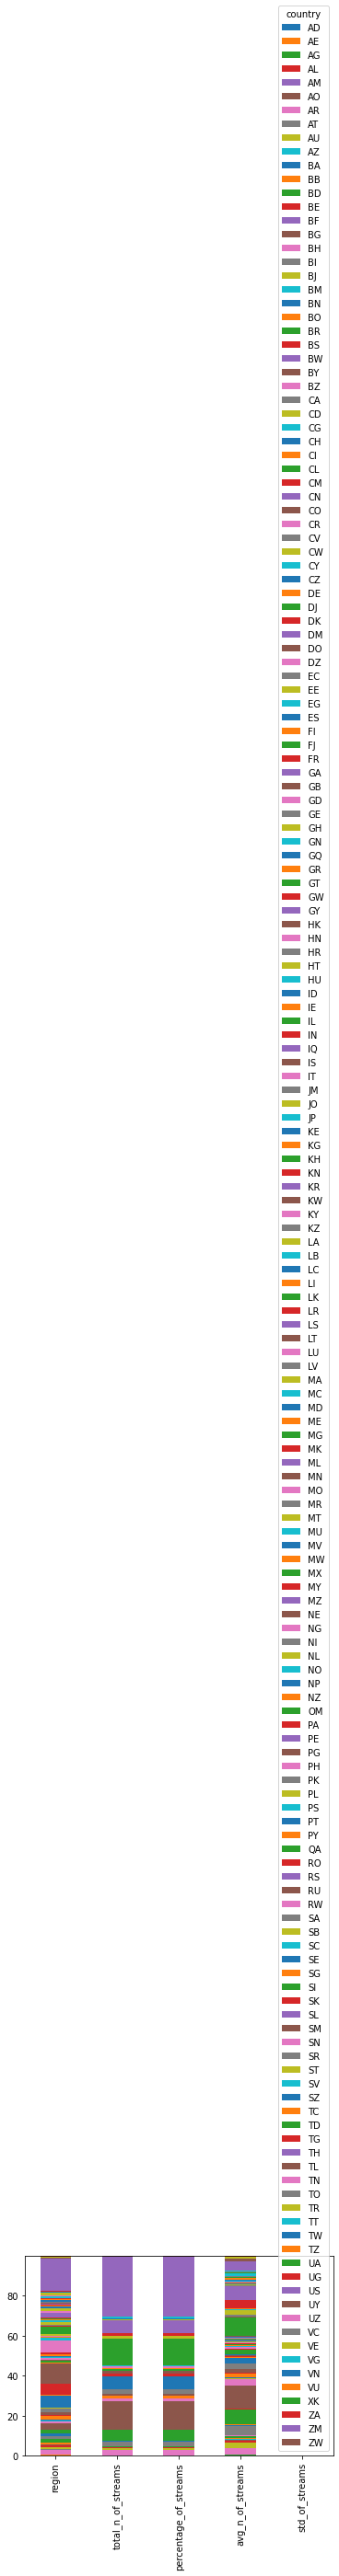

In [29]:
final_df.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar",stacked=True);

# B. per gender
- number of streams
- percentage of streams
- number of distinct regions

In [30]:
g_df=pd.DataFrame(streams.groupby('gender').n_of_streams.sum())

In [31]:
g_df

,n_of_streams
gender,
all,5925588
female,2269890
male,3655698


In [32]:
g_df['percentage']=pd.DataFrame(g_df.n_of_streams.div(n))

In [33]:
g_df

,n_of_streams,percentage
gender,,
all,5925588,47.634535
female,2269890,18.247160
male,3655698,29.387375


In [34]:
g_df1=pd.DataFrame(streams.groupby('gender').region.nunique())

In [35]:
g_df1

,region
gender,
all,2331
female,1997
male,2168


In [36]:
gen_df = pd.merge(g_df,g_df1, on = 'gender')

In [37]:
gen_df

,n_of_streams,percentage,region
gender,,,
all,5925588,47.634535,2331
female,2269890,18.247160,1997
male,3655698,29.387375,2168


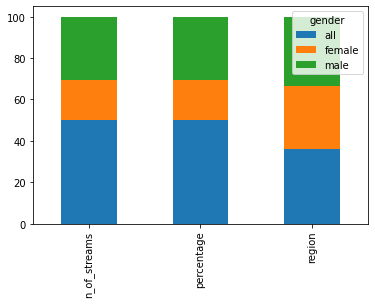

In [38]:
gen_df.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar",stacked=True);

# 3. Detect outliers
- Create "_outlier" variable of boolean type
- Assign a value True if the row is considered an outlier, and False if not
- A row is considered an outlier if the value of n_of_streams is out of +-1.5*IQR for country, region, gender group

In [39]:
out_df = pd.DataFrame(streams.groupby(['country','region','gender']).n_of_streams.sum())

In [40]:
out_df

n_of_streams
country region gender              
AD      AD-03  all               14
               female             4
               male              10
        AD-04  all                3
               female             3
...                             ...
ZM      ZM-09  all               13
               female             3
               male              10
ZW      ZW-HA  all                3
               male               3

[6894 rows x 1 columns]

In [41]:
Q1 = out_df.n_of_streams.quantile(0.25)
Q1

6.0

In [42]:
Q3 = out_df.n_of_streams.quantile(0.75)
Q3

281.0

In [43]:
IQR = Q3-Q1

In [44]:
IQR

275.0

In [45]:
lower_lim = Q1 - 1.5*IQR

In [46]:
upper_lim = Q3 + 1.5*IQR

In [47]:
lower_lim

-406.5

In [48]:
upper_lim

693.5

In [49]:
out_df['outlier'] = ((out_df['n_of_streams'] > upper_lim) | (out_df['n_of_streams'] < lower_lim).astype(bool))

In [50]:
out_df

n_of_streams  outlier
country region gender                       
AD      AD-03  all               14    False
               female             4    False
               male              10    False
        AD-04  all                3    False
               female             3    False
...                             ...      ...
ZM      ZM-09  all               13    False
               female             3    False
               male              10    False
ZW      ZW-HA  all                3    False
               male               3    False

[6894 rows x 2 columns]

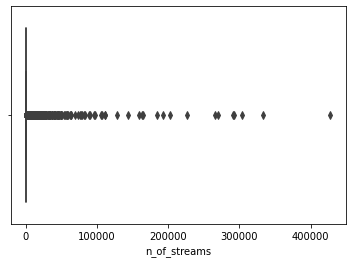

In [51]:
sns.boxplot(x = out_df['n_of_streams'])
plt.show()

In [52]:
df_log = np.log(out_df['n_of_streams'])

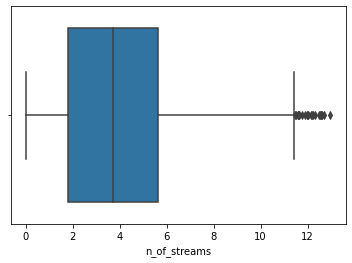

In [53]:
sns.boxplot(x = df_log)
plt.show()

/home/msargsyan/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


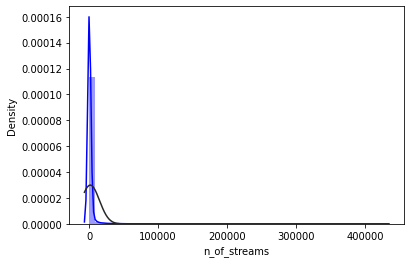

In [54]:
from scipy.stats import norm
sns.distplot(out_df['n_of_streams'], fit=norm,color ='b', kde = True)
plt.show()

/home/msargsyan/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


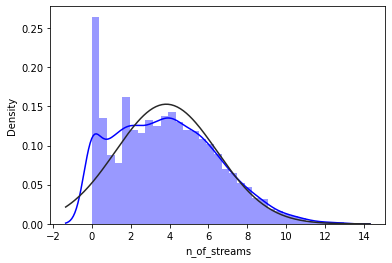

In [55]:
sns.distplot(df_log, fit=norm,color ='b', kde = True)
plt.show()

# 4. Generate spikes
- A spike is defined as an occasion when the moving average for the number of streams(previous 3 days) proceeds the moving average for the number of streams(previous 10 days) by 10 percent
- Create a boolean variable which shows if the instance is a spike of not
- Compute number of spikes per group (country, region, gender (male, female, all))

In [56]:
streams['date'] = pd.to_datetime(streams['date'])

In [57]:
spike_df = pd.DataFrame(streams.groupby(['date', 'country', 'region','gender']).n_of_streams.sum())

In [58]:
spike_df.head(20)

n_of_streams
date       country region  gender              
2021-10-09 AD      AD-07   all                3
                           female             3
                   AD-08   all                2
                           female             2
           AE      AE-DU   all               17
                           female             6
                           male              11
                   Unknown all                8
                           female             6
                           male               2
           AL      AL-TR   all                7
                           female             6
                           male               1
                   Unknown all                3
                           female             1
                           male               2
           AO      AO-LUA  all                1
                           male               1
           AR      AR-A    all               23
                           female             9

In [59]:
spike_df['mov_avg_3'] = spike_df.shift(1).rolling(window=3).mean()
spike_df['mov_avg_10'] = spike_df['n_of_streams'].shift(1).rolling(window=10).mean()

In [60]:
spike_df

n_of_streams  mov_avg_3  mov_avg_10
date       country region gender                                     
2021-10-09 AD      AD-07  all                3        NaN         NaN
                          female             3        NaN         NaN
                   AD-08  all                2        NaN         NaN
                          female             2   2.666667         NaN
           AE      AE-DU  all               17   2.333333         NaN
...                                        ...        ...         ...
2021-12-11 ZA      ZA-KZN female             1   3.666667         3.0
                          male               5   3.666667         2.9
                   ZA-WC  all               27   4.000000         2.9
                          female            10  11.000000         5.5
                          male              17  14.000000         6.1

[201854 rows x 3 columns]

In [61]:
spike_df['ratio'] = spike_df['mov_avg_3'] / spike_df['mov_avg_10']

In [62]:
spike_df.head(20)

n_of_streams  mov_avg_3  mov_avg_10  \
date       country region  gender                                        
2021-10-09 AD      AD-07   all                3        NaN         NaN   
                           female             3        NaN         NaN   
                   AD-08   all                2        NaN         NaN   
                           female             2   2.666667         NaN   
           AE      AE-DU   all               17   2.333333         NaN   
                           female             6   7.000000         NaN   
                           male              11   8.333333         NaN   
                   Unknown all                8  11.333333         NaN   
                           female             6   8.333333         NaN   
                           male               2   8.333333         NaN   
           AL      AL-TR   all                7   5.333333         6.0   
                           female             6   5.000000         6.4   
                           male               1   5.000000         6.7   
                   Unknown all                3   4.666667         6.6   
                           female             1   3.333333         6.7   
                           male               2   1.666667         5.1   
           AO      AO-LUA  all                1   2.000000         4.7   
                           male               1   1.333333         3.7   
           AR      AR-A    all               23   1.333333         3.0   
                           female             9   8.333333         4.7   

                                      ratio  
date       country region  gender            
2021-10-09 AD      AD-07   all          NaN  
                           female       NaN  
                   AD-08   all          NaN  
                           female       NaN  
           AE      AE-DU   all          NaN  
                           female       NaN  
                           male         NaN  
                   Unknown all          NaN  
                           female       NaN  
                           male         NaN  
           AL      AL-TR   all     0.888889  
                           female  0.781250  
                           male    0.746269  
                   Unknown all     0.707071  
                           female  0.497512  
                           male    0.326797  
           AO      AO-LUA  all     0.425532  
                           male    0.360360  
           AR      AR-A    all     0.444444  
                           female  1.773050

In [63]:
spike_df["spike"] = (spike_df["ratio"] >= 1.1).astype(bool)

In [64]:
spike_df

n_of_streams  mov_avg_3  mov_avg_10  \
date       country region gender                                        
2021-10-09 AD      AD-07  all                3        NaN         NaN   
                          female             3        NaN         NaN   
                   AD-08  all                2        NaN         NaN   
                          female             2   2.666667         NaN   
           AE      AE-DU  all               17   2.333333         NaN   
...                                        ...        ...         ...   
2021-12-11 ZA      ZA-KZN female             1   3.666667         3.0   
                          male               5   3.666667         2.9   
                   ZA-WC  all               27   4.000000         2.9   
                          female            10  11.000000         5.5   
                          male              17  14.000000         6.1   

                                     ratio  spike  
date       country region gender                   
2021-10-09 AD      AD-07  all          NaN  False  
                          female       NaN  False  
                   AD-08  all          NaN  False  
                          female       NaN  False  
           AE      AE-DU  all          NaN  False  
...                                    ...    ...  
2021-12-11 ZA      ZA-KZN female  1.222222   True  
                          male    1.264368   True  
                   ZA-WC  all     1.379310   True  
                          female  2.000000   True  
                          male    2.295082   True  

[201854 rows x 5 columns]

###### Number of spikes of each group

In [65]:
pd.DataFrame(spike_df.groupby('country').spike.value_counts())

spike
country spike       
AD      False    201
        True      70
AE      False    317
        True     258
AG      False     21
...              ...
ZA      False    333
ZM      False     18
        True      18
ZW      False      3
        True       1

[302 rows x 1 columns]

In [66]:
pd.DataFrame(spike_df.groupby('region').spike.value_counts())

spike
region spike       
500    True     149
       False     38
501    True     190
       False      2
502    True     121
...             ...
ZM-02  True       2
ZM-09  False     11
       True       9
ZW-HA  False      3
       True       1

[4020 rows x 1 columns]

In [67]:
pd.DataFrame(spike_df.groupby('gender').spike.value_counts())

spike
gender spike       
all    False  51742
       True   24841
female False  33570
       True   25209
male   False  40447
       True   26045

In [68]:
pd.DataFrame(spike_df.groupby(['country','region','gender']).spike.value_counts())

spike
country region gender spike       
AD      AD-03  all    False      4
                      True       3
               female False      3
               male   False      3
                      True       2
...                            ...
ZM      ZM-09  male   False      8
                      True       1
ZW      ZW-HA  all    False      1
                      True       1
               male   False      2

[10721 rows x 1 columns]

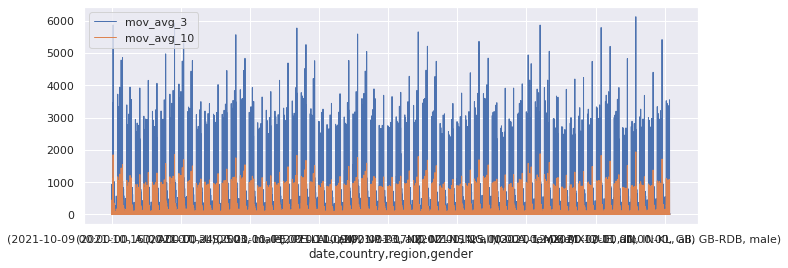

In [69]:
sns.set(rc={'figure.figsize':(11, 4)})
spike_df[['mov_avg_3','mov_avg_10']].plot(linewidth=1);

###### Now only group by date

In [70]:
df = pd.DataFrame(streams.groupby('date').n_of_streams.sum())

In [71]:
df

,n_of_streams
date,
2021-10-09,238115
2021-10-10,206134
2021-10-11,177108
2021-10-12,177516
2021-10-13,178170
...,...
2021-12-07,185404
2021-12-08,207613
2021-12-09,187499


In [72]:
df['MA3'] = df.shift(1).rolling(window=3).mean()

In [73]:
df['MA10'] = df['n_of_streams'].shift(1).rolling(window=10).mean()

In [74]:
df

,n_of_streams,MA3,MA10
date,,,
2021-10-09,238115,NaN,NaN
2021-10-10,206134,NaN,NaN
2021-10-11,177108,NaN,NaN
2021-10-12,177516,207119.000000,NaN
2021-10-13,178170,186919.333333,NaN
...,...,...,...
2021-12-07,185404,199135.333333,189817.0
2021-12-08,207613,187013.666667,185893.8
2021-12-09,187499,189103.000000,186860.6


In [75]:
df['proportion'] = df['MA3'] / df['MA10']

In [76]:
df

,n_of_streams,MA3,MA10,proportion
date,,,,
2021-10-09,238115,NaN,NaN,NaN
2021-10-10,206134,NaN,NaN,NaN
2021-10-11,177108,NaN,NaN,NaN
2021-10-12,177516,207119.000000,NaN,NaN
2021-10-13,178170,186919.333333,NaN,NaN
...,...,...,...,...
2021-12-07,185404,199135.333333,189817.0,1.049091
2021-12-08,207613,187013.666667,185893.8,1.006024
2021-12-09,187499,189103.000000,186860.6,1.012000


In [77]:
df["spike"] = (df["proportion"] >= 1.1).astype(bool)

In [78]:
df

,n_of_streams,MA3,MA10,proportion,spike
date,,,,,
2021-10-09,238115,NaN,NaN,NaN,False
2021-10-10,206134,NaN,NaN,NaN,False
2021-10-11,177108,NaN,NaN,NaN,False
2021-10-12,177516,207119.000000,NaN,NaN,False
2021-10-13,178170,186919.333333,NaN,NaN,False
...,...,...,...,...,...
2021-12-07,185404,199135.333333,189817.0,1.049091,False
2021-12-08,207613,187013.666667,185893.8,1.006024,False
2021-12-09,187499,189103.000000,186860.6,1.012000,False


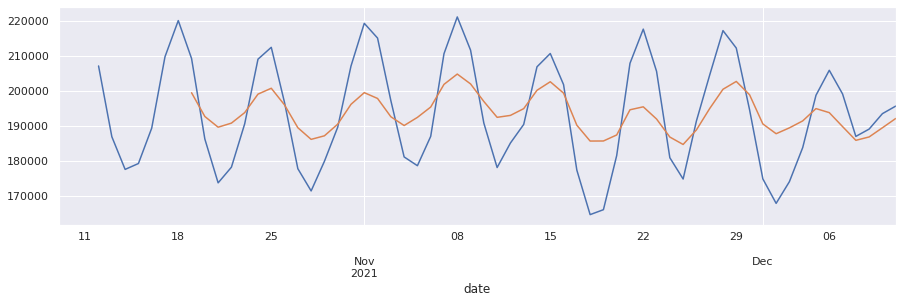

In [79]:
df[["MA3", "MA10"]].resample("1y").plot(figsize=(15,4));

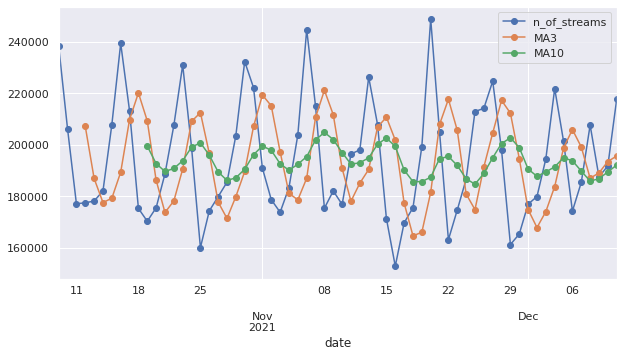

In [80]:
df[['n_of_streams','MA3','MA10']].resample("D").mean().plot(style="-o", figsize=(10, 5));